In [84]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

import run_utils
from run_utils import run_env_experiment, plot_ratings_mses

from reclab import data_utils

sys.path.append('../') 
from reclab.environments import Topics
from reclab.environments import Engelhardt
from reclab.environments import LatentFactorBehavior
from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop
from reclab.recommenders import Cfnade
#from reclab.recommenders import Autorec
#from reclab.recommenders import Llorma

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cfnade model performance

In this notebook, for a fixed level of model and user behavior complexity, we illustrate the effect of different time-varying user behaviors on recommendation system quality. We will focus on the Cfnade model performance, comparing to libfm. We may also want to do more comparisons to other models. 

Specifically, we evaluate two metrics: observed ratings of recommended items, and predictive accuracy on recommended items. We may also want to look at diversity metrics, or those used in other papers.

In [80]:
## Key Parameters across all settings
bucket_name = 'recsys-eval'
data_dir = 'Wenshuo'

## Static User Behavior

In [79]:
topics = True

num_users = 100
num_items = 170
num_init_ratings = 1000
rating_frequency = 0.2

n_trials = 1
trial_seeds = [i for i in range(n_trials)]
len_trial = 10

In [81]:

recommender_names = ['libfm (lr=0.01)', 'libfm (lr=0.1)', 'cfnade']

recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.1
    ),
     Cfnade(
        num_users=num_users,
        num_items=num_items,
        batch_size=64,
        train_epoch=30,
        hidden_dim=250,
        learning_rate=0.001,
    ),
]

/home/ec2-user/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output predicted_ratings missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to predicted_ratings.
  'be expecting any data to be passed to {0}.'.format(name))


In [74]:
if topics:
    params = {'num_topics': 10}
    env = Topics(num_users=num_users,
                 num_items=num_items,
                 rating_frequency=rating_frequency,
                 num_topics=10)
else:
    params = {'latent_dim': 8}
    env = LatentFactorBehavior(**params, **env_params)
environment_names = ['topics_static']
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders,
                                                                trial_seeds=trial_seeds,
                                                                len_trial=len_trial,
                                                                environment_names=environment_names,
                                                                recommender_names=recommender_names,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=True)

Started experiments on environment: topics_static
Running trials for recommender: libfm (lr=0.01)
Running trial with seed: 0



Saving results to S3.
Running trials for recommender: libfm (lr=0.1)
Running trial with seed: 0



Saving results to S3.
Running trials for recommender: cfnade
Running trial with seed: 0
Epoch 1/30
2/2 [==============================] - 0s 117ms/step - loss: 461.5833 - nade_loss_loss: 457.4141
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 302.2798 - nade_loss_loss: 298.1377
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - loss: 237.2560 - nade_loss_loss: 233.1147
Epoch 4/30
2/2 [==============================] - 0s 8ms/step - loss: 198.0205 - nade_loss_loss: 193.8555
Epoch 5/30
2/2 [==============================] - 0s 8ms/step - loss: 123.2145 - nade_loss_loss: 119.0038
Epoch 6/30
2/2 [==============================] - 0s 8ms/step - loss: 81.9675 - nade_loss_loss: 77.6943
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 73.8351 - nade_loss_loss: 69.4885
Epoch 8/30
2/2 [==============================] - 0s 8ms/step - loss: 51.5157 - nade_loss_loss: 47.0880
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - los

Epoch 1/30
2/2 [==============================] - 0s 23ms/step - loss: 476.4306 - nade_loss_loss: 472.2559
Epoch 2/30
2/2 [==============================] - 0s 18ms/step - loss: 350.0063 - nade_loss_loss: 345.8539
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - loss: 283.9189 - nade_loss_loss: 279.7807
Epoch 4/30
2/2 [==============================] - 0s 8ms/step - loss: 246.7281 - nade_loss_loss: 242.5802
Epoch 5/30
2/2 [==============================] - 0s 8ms/step - loss: 145.1737 - nade_loss_loss: 140.9834
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 89.2120 - nade_loss_loss: 84.9490
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 78.2938 - nade_loss_loss: 73.9350
Epoch 8/30
2/2 [==============================] - 0s 8ms/step - loss: 44.0516 - nade_loss_loss: 39.5823
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 48.4316 - nade_loss_loss: 43.8458
Epoch 10/30
2/2 [==============================] - 0

Epoch 19/30
2/2 [==============================] - 0s 8ms/step - loss: 20.0673 - nade_loss_loss: 14.5413
Epoch 20/30
2/2 [==============================] - 0s 8ms/step - loss: 25.0693 - nade_loss_loss: 19.5050
Epoch 21/30
2/2 [==============================] - 0s 9ms/step - loss: 17.6679 - nade_loss_loss: 12.0706
Epoch 22/30
2/2 [==============================] - 0s 8ms/step - loss: 11.0731 - nade_loss_loss: 5.4482
Epoch 23/30
2/2 [==============================] - 0s 9ms/step - loss: 25.7749 - nade_loss_loss: 20.1264
Epoch 24/30
2/2 [==============================] - 0s 8ms/step - loss: 24.3012 - nade_loss_loss: 18.6332
Epoch 25/30
2/2 [==============================] - 0s 8ms/step - loss: 14.3103 - nade_loss_loss: 8.6261
Epoch 26/30
2/2 [==============================] - 0s 8ms/step - loss: 19.1215 - nade_loss_loss: 13.4232
Epoch 27/30
2/2 [==============================] - 0s 8ms/step - loss: 9.7312 - nade_loss_loss: 4.0214
Epoch 28/30
2/2 [==============================] - 0s 8ms/s

2/2 [==============================] - 0s 8ms/step - loss: 94.6961 - nade_loss_loss: 90.4109
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 67.0171 - nade_loss_loss: 62.6201
Epoch 8/30
2/2 [==============================] - 0s 8ms/step - loss: 44.2816 - nade_loss_loss: 39.7570
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 39.7514 - nade_loss_loss: 35.0967
Epoch 10/30
2/2 [==============================] - 0s 8ms/step - loss: 32.7111 - nade_loss_loss: 27.9311
Epoch 11/30
2/2 [==============================] - 0s 8ms/step - loss: 37.1949 - nade_loss_loss: 32.2974
Epoch 12/30
2/2 [==============================] - 0s 8ms/step - loss: 34.9091 - nade_loss_loss: 29.9056
Epoch 13/30
2/2 [==============================] - 0s 8ms/step - loss: 22.1384 - nade_loss_loss: 17.0408
Epoch 14/30
2/2 [==============================] - 0s 8ms/step - loss: 39.0996 - nade_loss_loss: 33.9188
Epoch 15/30
2/2 [==============================] - 0s 8ms/step - loss:

2/2 [==============================] - 0s 9ms/step - loss: 39.4398 - nade_loss_loss: 33.8227
Epoch 25/30
2/2 [==============================] - 0s 8ms/step - loss: 20.2628 - nade_loss_loss: 14.6362
Epoch 26/30
2/2 [==============================] - 0s 8ms/step - loss: 35.1960 - nade_loss_loss: 29.5612
Epoch 27/30
2/2 [==============================] - 0s 8ms/step - loss: 31.1402 - nade_loss_loss: 25.4996
Epoch 28/30
2/2 [==============================] - 0s 8ms/step - loss: 14.4100 - nade_loss_loss: 8.7656
Epoch 29/30
2/2 [==============================] - 0s 8ms/step - loss: 44.1863 - nade_loss_loss: 38.5387
Epoch 30/30
2/2 [==============================] - 0s 8ms/step - loss: 28.3771 - nade_loss_loss: 22.7266
Epoch 1/30
2/2 [==============================] - 0s 13ms/step - loss: 477.6337 - nade_loss_loss: 473.4583
Epoch 2/30
2/2 [==============================] - 0s 10ms/step - loss: 348.2388 - nade_loss_loss: 344.0837
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - 

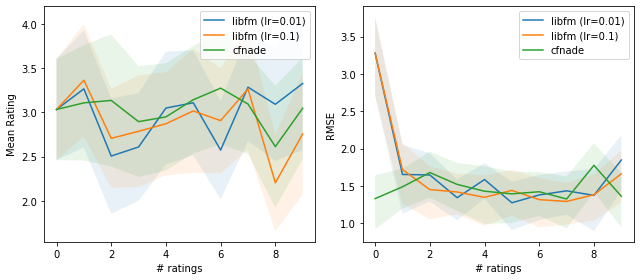

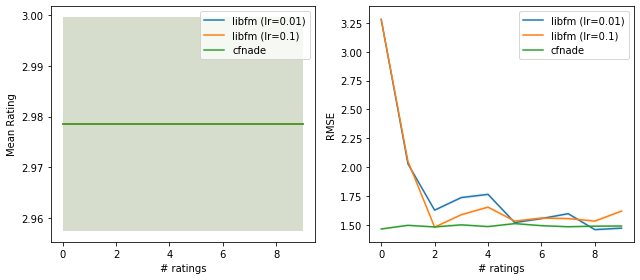

In [75]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)

# ML-100k

In [78]:
users, items, ratings = data_utils.read_dataset('ml-100k')
env_name = 'ml-100k'

In [87]:

default_params = dict(num_two_way_factors=32, learning_rate=0.1,
              bias_reg=0., one_way_reg=0., two_way_reg=0., 
              num_iter=100, num_user_features=0, num_item_features=0, num_rating_features=0,
              max_num_users=len(users), max_num_items=len(items))

tuner = run_utils.ModelTuner((users, items, ratings),
                             default_params,
                             Cfnade,
                             n_fold=5,
                             verbose=True,
                             bucket_name=bucket_name,
                             data_dir=data_dir,
                             environment_name=env_name,
                             recommender_name='cfnade')